In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터셋, 데이터로더

In [2]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

batch_size = 16
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 오토인코더 모델

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Linear(28*28,20)
        self.decoder = nn.Linear(20,28*28)   
                
    def forward(self,x):
        x = x.view(batch_size,-1) # flatten
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size,1,28,28) # 이미지 생성
                
        return out
    
model = Autoencoder().cuda()

### Parameter, Loss function and Optimizer

In [4]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 5

# loss function and optimizer
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 모델 학습

In [5]:
loss_arr =[]

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = Variable(image).cuda()
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()


## 시각화

In [12]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
# 16 * 1 * 28 * 28 -> 16 * 28 * 28 로 바뀜

torch.Size([16, 28, 28])


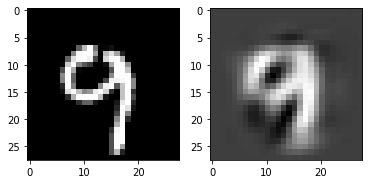

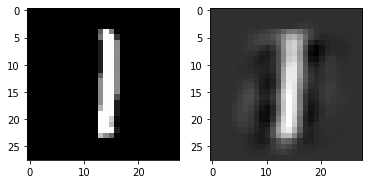

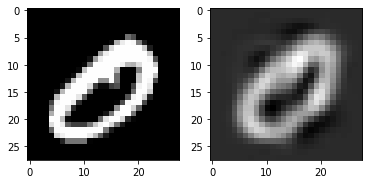

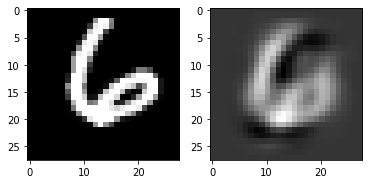

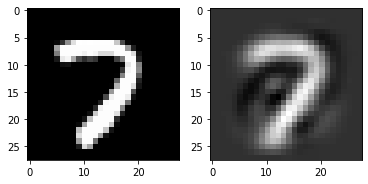

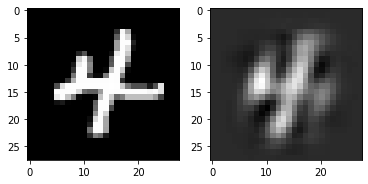

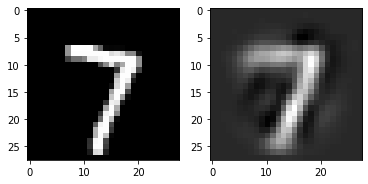

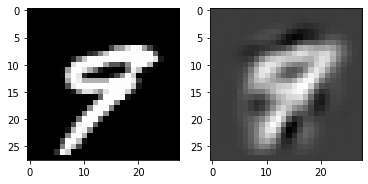

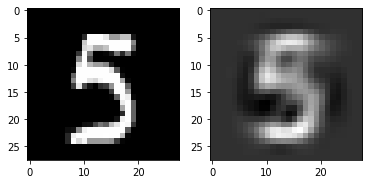

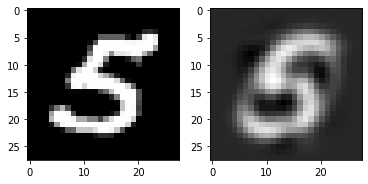

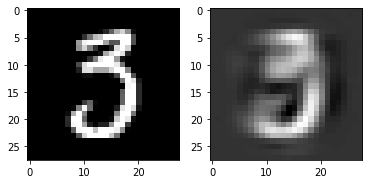

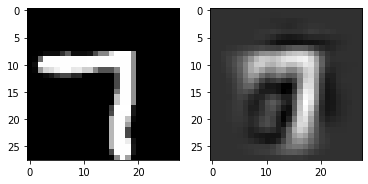

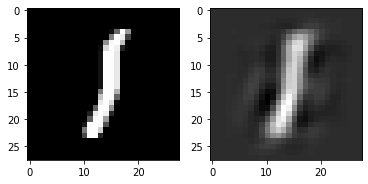

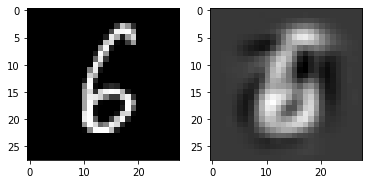

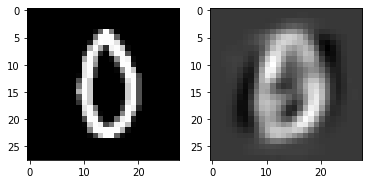

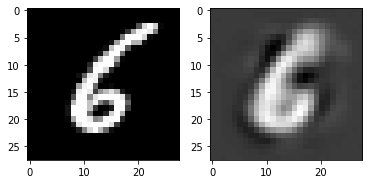

In [17]:
# 이미지 16개
for i in range(out_img.size()[0]):
    plt.subplot(121)
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.subplot(122)
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()
